# Moments

> In mathematics, a moment is a specific quantitative measure, used in both mechanics and statistics, of the shape of a set of points.

https://en.wikipedia.org/wiki/Moment_(mathematics)



If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass
- the second moment is the rotational inertia

If the points represent probability density:

- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third central moment is the skewness
- the fourth central moment (with normalization and shift) is the kurtosis.

### Continuous Probability

The $k$-th moment of a real-valued continuous function, a **probability density function**, $f(x)$ of a real variable about a value $c$ is

$$\mu_k = \int_{-\infty}^\infty (x - c)^k\,f(x)\,\mathrm{d}x$$

### Discrete Probabilty

The $k$-th moment of a real-valued discrete function, a **probability mass function**,  $p(x)$ of a real variable about a value $c$ is

$$\mu_k = \sum (x - c)^kp(x)$$

# Simple Case: the Mean

Consider the first moment for a discrete valued probabilty where each value has an equal chance of being observed.

Then, for a list of $n$ values

$$\mathcal{D} = \{x_1, \dots, x_n\}$$

each with probabilty $p(x_k)= \frac{1}{n}$

Then 

$$\mu_1 = \sum (x)^1p(x)= \sum x\frac{1}{n} = \frac{1}{n}\sum x$$

This is the well-known mean you are used to. We typically refer to it simply as $\mu$

$$\mu = \frac{1}{n}\sum x$$

We also call this an **Expected Value**, $\mathbb{E}[x]$, and for the common case

$$\operatorname{E}[x] = \mu$$

In python:

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
n = 20
D = np.random.randint(1,20,n)
D

array([14, 15, 10,  1, 18,  6,  9,  4,  2,  4, 17, 17,  6,  9, 14,  9, 16,
        7,  4,  3])

In [5]:
mu = 1/(n)*np.sum(D)
mu
# mu = mean

9.25

In [6]:
D.mean()

9.25

# Simple Case: the Variance

Consider the second **central** moment for a discrete valued probabilty where each value has an equal chance of being observed. We call it **central** because we will center this value around the mean.

Then 

$$\mu_2 = \sum (x - \mu)^2p(x)= \frac{1}{n}\sum (x - \mu)^2$$

This is just the expected value of $(x-\mu)^2$. We call this the **variance**, denoted $\sigma^2$.

$$\sigma^2 = \mathbb{E}\left[(x-\mu)^2\right]$$

In python:

In [7]:
var = 1/n*np.sum((D-mu)**2)
var

19.927500000000002

In [8]:
D.var()

19.927500000000002

Note that the square root of the variance is the standard deviation.

In [9]:
np.sqrt(var)

4.4640228494038876

In [10]:
D.std()

4.4640228494038876

## Advanced Cases: Skew and Kurtosis

### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://en.wikipedia.org/wiki/Skewness

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width=400px>

Skewness is the third **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]$$

In python:

In [11]:
skew = 1/n*np.sum(((D-mu)/np.sqrt(var))**3)
skew

0.23363302657083215

In [12]:
import scipy.stats as st

In [13]:
st.skew(D)

0.23363302657083224

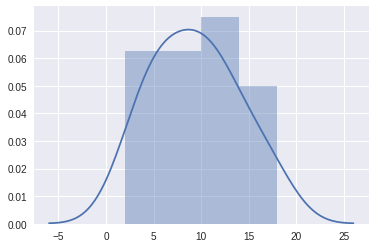

In [14]:
sns.distplot(D);

### Kurtosis

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

https://en.wikipedia.org/wiki/Kurtosis

Kurtosis is the fourth **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4 \right]$$

In python:

In [15]:
kurt = 1/n*np.sum(((D-mu)/np.sqrt(var))**4)
kurt

2.1432396520941288

In [16]:
st.kurtosis(D, fisher=False)

2.1432396520941284

# Describing a Distribution

Using these four values, we can describe the distribution of data.

mu: 9.35, var: 28.327500000000004, skew: -0.16738674077670265, kurt: 1.8031661520183553


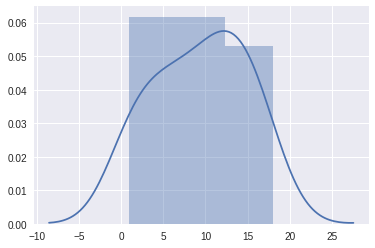

In [17]:
n = 20
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.685, var: 35.715775, skew: -0.03716302225282549, kurt: 1.7275308673050103


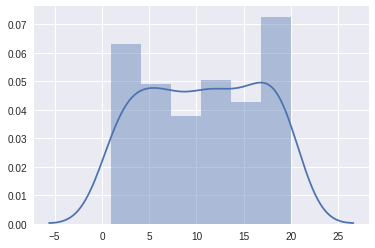

In [18]:
n = 200
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.4855, var: 32.750789749999996, skew: -0.0310811981936646, kurt: 1.811640900349571


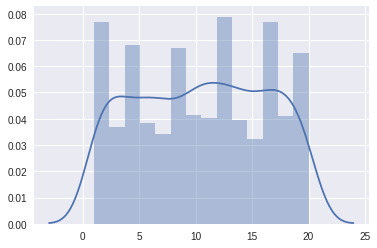

In [19]:
n = 2000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.44375, var: 33.1924359375, skew: 0.011325763529720277, kurt: 1.7975667712351633


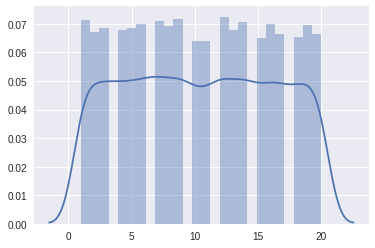

In [20]:
n = 20000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.50955, var: 33.2465087975, skew: -0.001387937986279754, kurt: 1.7921885305121916


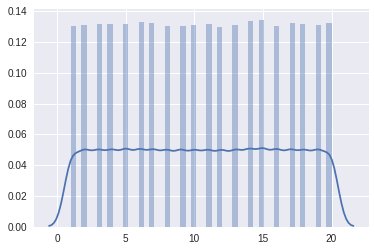

In [21]:
n = 200000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.501535, var: 33.24884464377502, skew: -0.000145268353842482, kurt: 1.7939019093670656


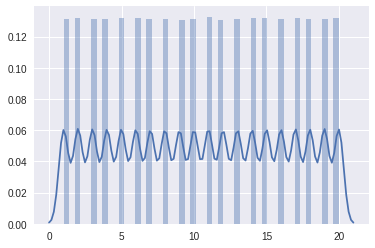

In [22]:
n = 2000000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

#### `randint` draws from a uniform distribution

    np.random.randint()

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

### What about `randn`?

In [23]:
D

array([11, 17,  6, ..., 11,  5, 11])

mu: 0.17912721048726005, var: 0.4602449729858879, skew: 0.11814990630683414, kurt: 2.1813381842984696


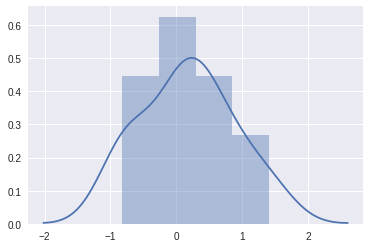

In [24]:
n = 20
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.06923313558434517, var: 1.1383446422845507, skew: 0.1656405685695255, kurt: 3.046878256258445


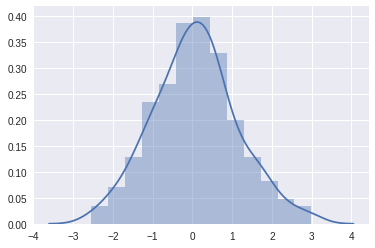

In [25]:
n = 200
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.003482198114631341, var: 1.0933559710408063, skew: 0.0628246841281713, kurt: 2.943111176759617


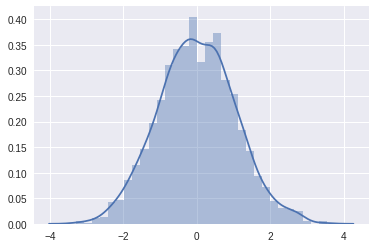

In [26]:
n = 2000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.011432967822013921, var: 1.008915008918124, skew: -0.008714523071752585, kurt: 3.05628386217282


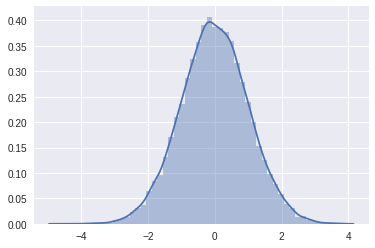

In [27]:
n = 20000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.0003917863393245399, var: 1.0013621186136459, skew: -0.0044471860237018535, kurt: 3.011544109253621


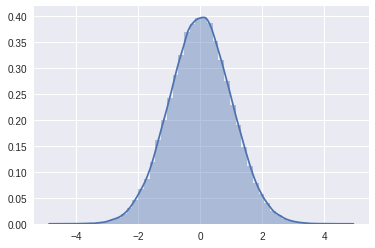

In [28]:
n = 200000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

In [7]:
from IPython.display import display

In [13]:
string= "foo\nBar"

In [14]:
display(string)

'foo\nBar'

In [16]:
print (string)

foo
Bar
